# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# leer conjuntos de datos en los DataFrames
order_df= pd.read_csv('/datasets/instacart_orders.csv', sep = ';')
products_df= pd.read_csv('/datasets/products.csv', sep = ';')
order_products_df= pd.read_csv('/datasets/order_products.csv', sep = ';')
aisles_df= pd.read_csv('/datasets/aisles.csv', sep = ';')
departments_df= pd.read_csv('/datasets/departments.csv', sep = ';')

In [3]:
# mostrar información del DataFrame
order_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame
products_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame
order_products_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [6]:
# mostrar información del DataFrame
aisles_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [7]:
# mostrar información del DataFrame
departments_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Al principio al leer los archivos de datos, las columnas salian unidas y no se podía leer correctamente la informacion que mostraba el dataframe con info(). El error existía en que las columnas estaban separadas por ';' y este provocaba que se lea mal el dataframe, se usó el método sep = ';' y así ya permitió leer correctamente los archivos de datos.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

Primero en esta base de datos si influye que tipos de datos son, todos están bien de por sí, excepto los flotantes, ya que no puede haber medios días donde el valor del flotante sirva para indicar sobre la columna de último día de orden y en la columna añadir al carrito, ambos deberían ser enteros, pero más adelante al revisar los datos todos llevan el valor flotante como x.0, así que no vendría ser un factor que pueda dañar la información que se pueda obtener. 

En los primeros 3 dataframes existen columnas con valores ausentes, usando el el método duplicated() y .drop.duplicated() para la eliminación de estos. 

El motivo por el cual estos valores ausentes y duplicados pudieron haber estado presente puede ser debido a que va a existir información que se va a tener que repetir necesariamente, tipo nombres a tipos de productos o la identificación de los usuarios, serían datos que se usarían varias veces y que cada nueva orden que generen pueden volver a aparecer.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print(order_df[order_df.duplicated()])


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Efectivamente habían 15 líneas duplicadas. Lo que tenían en común es que todas fueron realizadas el miércoles a las 2:00 a.m.

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
wed2 = order_df[(order_df['order_dow'] == 3) & (order_df['order_hour_of_day'] == 2)]
print(wed2)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?

Existen 121 pedidos que fueron realizados el miercoles a las 2:00 a.m.

In [10]:
# Elimina los pedidos duplicados
order_df = order_df.drop_duplicates().reset_index(drop=True)
print(order_df)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478947   3210681     5617             5          1                 14   
478948   3270802   112087             2          3                 13   
478949    885349    82944            16          2                 11   
478950    216274     4391             3          3                  8   
478951   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

In [11]:
# Vuelve a verificar si hay filas duplicadas
print(order_df.duplicated().sum())

0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(order_df['order_id'].duplicated().sum())



0


Describe brevemente tus hallazgos y lo que hiciste con ellos

Se realizo la revisión de datos duplicados y existían 15 filas con información duplicada. De ahi se procede a eliminar los duplicados y en la verificación de que no hayan más duplicados, se confirma que ya no habrían duplicados. 

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
products_df.duplicated().sum()

0

In [14]:
# Revisa únicamente si hay ID de departamentos duplicados
products_df[products_df.duplicated('department_id')]
 


,product_id,product_name,aisle_id,department_id
4,5,Green Chile Anytime Sauce,5,13
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7
10,11,Peach Mango Juice,31,7
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

products_df['product_name'].str.upper().duplicated().sum()

1361

In [16]:
# Revisa si hay nombres duplicados de productos no faltantes

no_missing = ~products_df['product_name'].isna() & products_df['product_name'].str.upper().duplicated()
print(no_missing.sum())

104


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Este dataframe es especial con sus datos, ya que será de esperarse que tenga información y filas duplicadas ya que ejemplo la columna 'department_id' funciona con valores de números y será de esperarse que se repitan cuando se llame esta información cada vez que un producto salga de esta. Eso si existen 1361 productos duplicados que se los convierte a mayúscula para comparar mejor y 104 de nombres duplicados de productos no faltantes.

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
departments_df.duplicated().sum()

0

In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
print(departments_df.duplicated('department_id').sum()) 

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

En este dataframe no existen filas totalmente duplicadas, ni IDs duplicadas, así que no habría problema alguna.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
aisles_df.duplicated().sum()

0

In [20]:
# Revisa únicamente si hay IDs duplicadas de productos
print(aisles_df.duplicated('aisle_id').sum()) 

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

En este dataframe no existe filas totalmente duplicadas, ni IDs duplicadas de productos, por lo que estarían bien estos datos.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
order_products_df.duplicated().sum()

0

In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
order_products_df.duplicated(['order_id','product_id']).sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

En el dataframe no hay filas totalmente duplicadas o algún duplicado como de órdenes iguales.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
products_df['product_name'].isna().sum()

1258

Describe brevemente cuáles son tus hallazgos.

Existen 1258 valores ausentes en la columna 'product_name' 

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
hall100 = products_df[(products_df['product_name'].isna()) & (products_df['aisle_id']==100)]
print(hall100)
print(hall100.count())

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]
product_id       1258
product_name        0
aisle_id         1258
department_id    1258
dtype: int64


Describe brevemente cuáles son tus hallazgos.

Efectivamente todos los nombres de productos que están ausentes pertenecen al pasillo 100.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
Id21 = products_df.loc[(products_df['product_name'].isna()) & (products_df['department_id']==21)]
print(Id21)
print(Id21.count())

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]
product_id       1258
product_name        0
aisle_id         1258
department_id    1258
dtype: int64


Describe brevemente cuáles son tus hallazgos.

Y en corcondancia con que estos nombres de productos que faltan provienen del pasillo 100 vienen del departamento con identificación 21.

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(departments_df[departments_df['department_id'] == 21]['department'])
print(aisles_df[aisles_df['aisle_id']==100]['aisle'])


20    missing
Name: department, dtype: object
99    missing
Name: aisle, dtype: object


Describe brevemente cuáles son tus hallazgos.

Existen 20 filas con información ausente del dataframe departments , de la columna 'department_id' 21. Y existen 99 filas de información ausente del dataframe aisles_df, de la columna 'aisle_id' 100.

In [68]:
# Completa los nombres de productos ausentes con 'Unknown'
products_df['product_name']= products_df['product_name'].fillna('Unknown')
print(products_df['product_name'])


0                               Chocolate Sandwich Cookies
1                                         All-Seasons Salt
2                     Robust Golden Unsweetened Oolong Tea
3        Smart Ones Classic Favorites Mini Rigatoni Wit...
4                                Green Chile Anytime Sauce
                               ...                        
49689                        HIGH PERFORMANCE ENERGY DRINK
49690                        ORIGINAL PANCAKE & WAFFLE MIX
49691      ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692                               SPRING WATER BODY WASH
49693                              BURRITO- STEAK & CHEESE
Name: product_name, Length: 49694, dtype: object


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Con la información ausente se la reemplazó con el método .fillna() por 'Unknown' para que no existen datos ausentes en el dataframe.

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
order_df.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

order_df[(order_df['days_since_prior_order'].isna()) & (order_df['order_number'] != 1)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Esta es una información "capciosa" es decir no existe información previo al primer pedido de un cliente, porque es nuevo, no puede haber información de días desde el último pedido con los clientes nuevos porque son nuevos.

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
order_products_df.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(order_products_df['add_to_cart_order'].min())
print(order_products_df['add_to_cart_order'].max())

1.0
64.0


Describe brevemente cuáles son tus hallazgos.
Que como mínimo piden 1 producto y como máximo han pedido hasta 64 productos en una orden.

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
order_id_missing =  order_products_df[order_products_df['add_to_cart_order'].isna()]['order_id'].unique()
print(order_id_missing)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
missing_values = order_products_df[order_products_df['order_id'].isin(order_id_missing)]
print(missing_values.groupby('order_id')['product_id'].count())

order_id
9310        65
61355      127
102236      95
129627      69
165801      70
          ... 
2999801     70
3125735     86
3308010    115
3347453     71
3383594     69
Name: product_id, Length: 70, dtype: int64


Describe brevemente cuáles son tus hallazgos.

Los pedidos ausentes poseen más de 64 productos, ya agrupados por la ID de pedido la cantidad mínima de 'product_id' en los pedidos fue de 65. Confirmando que los pedidos ausentes poseen más de 64 prodcutos.

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].fillna(value=999)
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].astype('int')
print(order_products_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB
None


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se reemplazo los valores ausentes por el valor 999 y el tipo de columna 'add_to_cart_order' fue cambiado a 'int' porque era un tipo flotante y podría traer problemas mantenerlo así.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Se ha revisado sobre los valores duplicados y ausentes de los dataframes. Los dataframes 'products', 'orders', 'order_products' venían con valores duplicados y ausentes. A través de los métodos para duplicados como .duplicated() se procedió a su detección y posterior eliminación con drop.duplicates(). Lo más llamativo fue en los valores ausentes, ya que en el dataframe 'products' estos valores ausentes se daban en el mismo pasillo 100 y la misma área 21 que fueron reemplazados a 'Unknown'. En el dataframe 'orders' en cambio estos valores ausentes eran naturales debido a las órdenes primerizas de los clientes y por lo tanto no podría haber información de ellos en la columna 'days_since_prior_order'. Y finalmente en el dataframe ' order_products' estos valores ausentes se daban en todas los pedidos que tenían más de 64 productos, se reemplazó por el valor de 999 y se modificó el tipo de datos de esta columna de flotante a 'int' para evitar futuros problemas con estos datos. 


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
print(order_df['order_hour_of_day'].max())
print(order_df['order_hour_of_day'].min())
sorted(order_df['order_hour_of_day'].unique())

23
0


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [36]:
print(order_df['order_dow'].max())
print(order_df['order_dow'].min())
sorted(order_df['order_dow'].unique()) 

6
0


[0, 1, 2, 3, 4, 5, 6]

Escribe aquí tus conclusiones

Se puede comprobar que los valores en 'order_hour_of_day' si están completos y son sensibles ya que recorren de 0 a 23, sin problema y los valores de 'order_dow' recorren de 0 a 6, correspondiente a los 7 días de la semana.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

<AxesSubplot:title={'center':'Órdenes según la hora'}, xlabel='Hora', ylabel='Órdenes'>

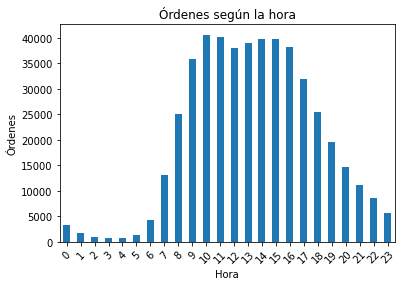

In [37]:
ordersbyhour= order_df['order_hour_of_day'].value_counts().sort_index()
ordersbyhour.plot(kind='bar',title='Órdenes según la hora', xlabel= 'Hora', rot= 45, ylabel='Órdenes')


Escribe aquí tus conclusiones

La mayor cantidad de órdenes se da entre las 10:00 - 16:00 

### [A3] ¿Qué día de la semana compran víveres las personas?

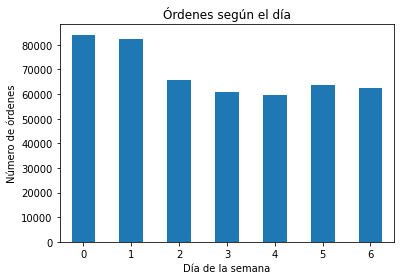

In [38]:
buying_days = order_df['order_dow'].value_counts().sort_index()
buying_days.plot(kind='bar',
                title='Órdenes según el día',
                xlabel='Día de la semana',
                ylabel='Número de órdenes',
                rot= 360
                )
plt.show()

Escribe aquí tus conclusiones

Los días Doming y Lunes, son los días con mayor número de órdenes.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

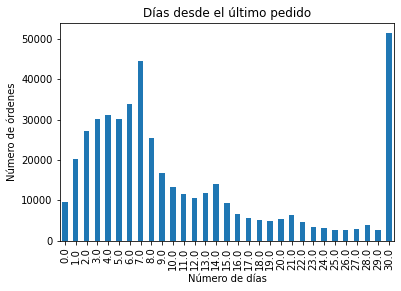

In [39]:
wait_time=order_df['days_since_prior_order'].value_counts().sort_index()
wait_time.plot(kind='bar',
               title='Días desde el último pedido',
               xlabel='Número de días',
               ylabel='Número de órdenes'
               )
plt.show()

Escribe aquí tus conclusiones

El pico que existe en  cuantos días transcurren hasta el siguiente pedido de los clientes suele ser de 7 días, pero también aparece 30 días como el pico más alto, esto bien puede darse como un límite que exista por el sistema que usa de 30 días y clientes que ya tengan más días tipo 31 en adelante están en este grupo.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [40]:
wed_hour = order_df['order_dow'] == 3
wed_hour_order = order_df[wed_hour]['order_hour_of_day'].value_counts().sort_index()
print(wed_hour_order)

0      373
1      215
2      106
3      101
4      108
5      170
6      643
7     1732
8     3125
9     4490
10    5026
11    5004
12    4688
13    4674
14    4774
15    5163
16    4976
17    4175
18    3463
19    2652
20    1917
21    1450
22    1154
23     718
Name: order_hour_of_day, dtype: int64


In [41]:
sat_hour = order_df['order_dow'] == 6
sat_hour_order = order_df[sat_hour]['order_hour_of_day'].value_counts().sort_index()
print(sat_hour_order)


0      464
1      254
2      177
3      125
4      118
5      161
6      451
7     1619
8     3246
9     4311
10    4919
11    5116
12    5132
13    5323
14    5375
15    5188
16    5029
17    4295
18    3338
19    2610
20    1847
21    1473
22    1185
23     893
Name: order_hour_of_day, dtype: int64


In [42]:
hdays_orders = pd.concat([wed_hour_order, sat_hour_order], axis=1)
hdays_orders.columns = ['Wednesday', 'Saturday']
print(hdays_orders)

    Wednesday  Saturday
0         373       464
1         215       254
2         106       177
3         101       125
4         108       118
5         170       161
6         643       451
7        1732      1619
8        3125      3246
9        4490      4311
10       5026      4919
11       5004      5116
12       4688      5132
13       4674      5323
14       4774      5375
15       5163      5188
16       4976      5029
17       4175      4295
18       3463      3338
19       2652      2610
20       1917      1847
21       1450      1473
22       1154      1185
23        718       893


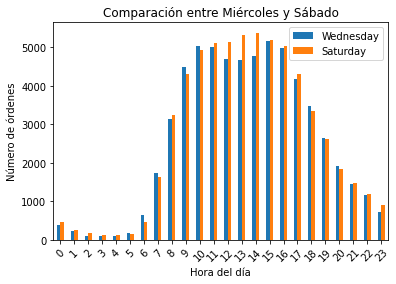

In [43]:
hdays_orders.plot(kind='bar',
                title='Comparación entre Miércoles y Sábado',
                xlabel='Hora del día',
                ylabel='Número de órdenes',
                rot= 45  
               )
plt.show()         

Escribe aquí tus conclusiones

Existen mucha similitud entre los horarios de compra de ambos días, pero los sábados hay un mayor número de órdenes entre las 12-14 a diferencia del miércoles que disminuye en estas mismas horas, del resto de horas del día tienen un comportamiento muy similar.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [44]:
distribution_numbers = order_df['user_id'].value_counts()
print(distribution_numbers)

149605    28
193164    26
78375     25
148162    24
66664     24
          ..
166116     1
63564      1
170214     1
51274      1
2047       1
Name: user_id, Length: 157437, dtype: int64


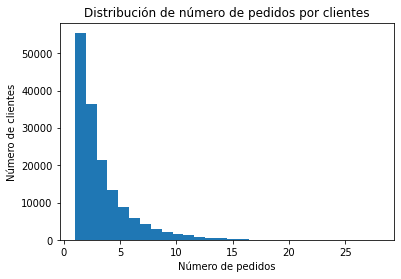

In [45]:
distribution_numbers.plot(kind='hist',
                          bins=28,
                          title='Distribución de número de pedidos por clientes'
                         )
plt.xlabel('Número de pedidos')
plt.ylabel('Número de clientes')
plt.show()

Escribe aquí tus conclusiones

La gran mayoría de clientes realizan de 1 a 5 pedidos, después de esto la cantidad de pedidos que realizan disminuye debajo del 20% del total de clientes y mientras mayor pedidos sean más disminuye la cantidad de pedidos.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [46]:
popular_products = order_products_df.merge(products_df, on='product_id')
print(popular_products)

         order_id  product_id  add_to_cart_order  reordered  \
0         2141543       11440                 17          0   
1          147172       11440                  7          1   
2         3341719       11440                  4          1   
3         1938779       11440                  8          1   
4         1728338       11440                 23          0   
...           ...         ...                ...        ...   
4545002    267402       45226                 14          0   
4545003   2621676       25201                 10          0   
4545004    937623       49153                  2          0   
4545005    532895        8182                  1          0   
4545006   3132243       40024                  1          0   

                               product_name  aisle_id  department_id  
0            Chicken Breast Tenders Breaded       129              1  
1            Chicken Breast Tenders Breaded       129              1  
2            Chicken Breast Te

In [47]:
popular_products = popular_products.groupby(['product_id', 'product_name']).size().sort_values(ascending=False)
popular_products.head(20)

product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781
dtype: int64

<AxesSubplot:title={'center':'Top 20 productos más populares'}, xlabel='Productos', ylabel='Cantidad'>

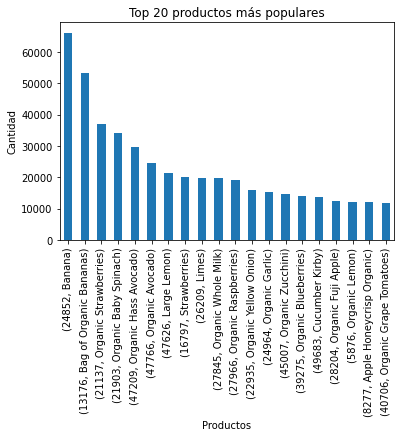

In [48]:

popular_products.head(20).plot(kind='bar',
                      title='Top 20 productos más populares',
                      xlabel='Productos',
                      ylabel='Cantidad',
                     )






Escribe aquí tus conclusiones

Los 20 productos más populares resultan ser frutas, frutas orgánicas y verduras. Probablemente este sea el mayor atractivo que posee Instacart y considerando que las frutas en especial las orgánicas tienen un tiempo de duración corta ya sea en perchas como en los hogares, sería normal esperar que sean de alta demanda en el local.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [49]:
one_order = order_products_df.groupby('order_id')['product_id'].nunique()
print(one_order)

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64


In [50]:
one_order = one_order.value_counts()
print(one_order.sort_index())

1      21847
2      26292
3      29046
4      31054
5      31923
       ...  
98         1
104        1
108        1
115        1
127        1
Name: product_id, Length: 90, dtype: int64


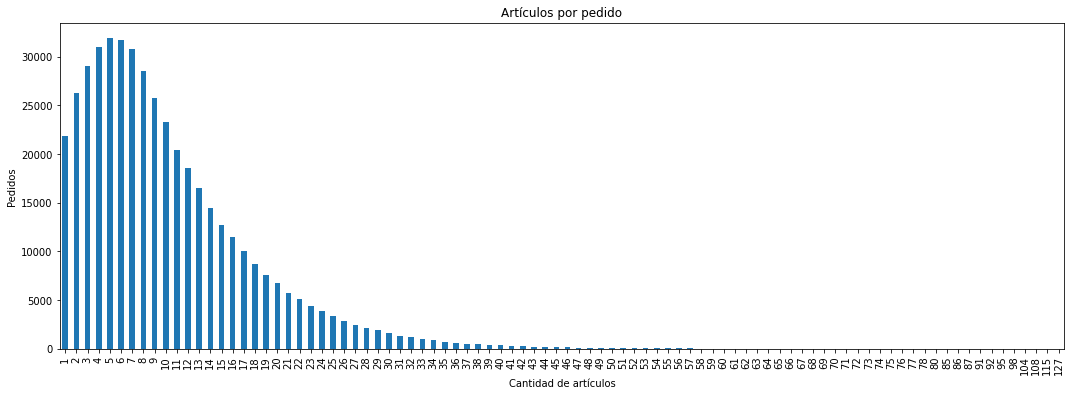

In [51]:
one_order.sort_index().plot(kind='bar',
                            title='Artículos por pedido', 
                            figsize=(18,6),
                            xlabel= 'Cantidad de artículos',
                            ylabel= 'Pedidos'
                           )
plt.show()

Escribe aquí tus conclusiones

Usualmente la mayor cantidad de productos por orden que se da es de 4-7 productos, de ahí en adelante la cantidad de productos por orden van disminuyendo en forma progresiva.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [52]:
most_reordered = order_products_df[order_products_df['reordered'] == 1]
most_reordered.head(20)

,order_id,product_id,add_to_cart_order,reordered
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1
5,2456893,21616,4,1
6,644579,12341,5,1
7,2231852,44925,10,1
8,3185766,36259,14,1
9,420019,23315,4,1
10,925051,9421,2,1


In [53]:
df_merge = most_reordered.merge(products_df, on='product_id')
df_merge

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,567889,1560,1,1,Bag Of Ice,37,1
1,761899,1560,2,1,Bag Of Ice,37,1
2,1388514,1560,8,1,Bag Of Ice,37,1
3,2629631,1560,1,1,Bag Of Ice,37,1
4,866921,1560,6,1,Bag Of Ice,37,1
...,...,...,...,...,...,...,...
2683833,1338379,33506,3,1,Simply 9 White Meat Chicken & Whole Barley Rec...,40,8
2683834,191894,27878,3,1,Crackers Wheat Sundried Tomato Basil Crispy,78,19
2683835,3041739,31751,14,1,French Style Cut Green Beans,116,1
2683836,949244,24384,18,1,Invisible Matte Finish Tape,10,17


In [54]:
most_reordered = df_merge.groupby(['product_id', 'product_name']).size().sort_values(ascending=False)
most_reordered.head(20)

product_id  product_name            
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629
47766       Organic Avocado             18743
27845       Organic Whole Milk          16251
47626       Large Lemon                 15044
27966       Organic Raspberries         14748
16797       Strawberries                13945
26209       Limes                       13327
22935       Organic Yellow Onion        11145
24964       Organic Garlic              10411
45007       Organic Zucchini            10076
49683       Cucumber Kirby               9538
28204       Organic Fuji Apple           8989
8277        Apple Honeycrisp Organic     8836
39275       Organic Blueberries          8799
5876        Organic Lemon                8412
49235       Organic Half & Half          8389
dtype: int64

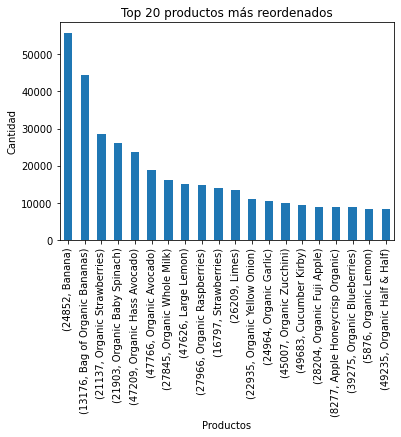

In [55]:

most_reordered.head(20).plot(kind='bar',
                      title='Top 20 productos más reordenados',
                      xlabel='Productos',
                      ylabel='Cantidad',
                     )
plt.show()

Escribe aquí tus conclusiones

Esta gráfica muestra que se repiten muchos de los 20 productos más populares en la gráfica anterior. Debe darse a que son productos de consumo inmediato y que su tiempo en los hogares no puede ser de mucho tiempo en especial los productos orgánicos que se deterioran más rápido.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [56]:
order_products_df['reordered'].unique()


array([0, 1])

In [57]:
df_merge = order_products_df.merge(products_df)
reorder_rate = df_merge.groupby(['product_id', 'product_name'])['reordered'].mean()
print(reorder_rate)

product_id  product_name                                                     
1           Chocolate Sandwich Cookies                                           0.564286
2           All-Seasons Salt                                                     0.000000
3           Robust Golden Unsweetened Oolong Tea                                 0.738095
4           Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce    0.510204
7           Pure Coconut Water With Orange                                       0.500000
                                                                                   ...   
49690       HIGH PERFORMANCE ENERGY DRINK                                        0.800000
49691       ORIGINAL PANCAKE & WAFFLE MIX                                        0.430556
49692       ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                      0.416667
49693       SPRING WATER BODY WASH                                               0.440000
49694       BURRITO- S

In [58]:
reorder_rate_df = reorder_rate.sort_values(ascending=False).reset_index()
reorder_rate_df.sort_values(by='product_id')

,product_id,product_name,reordered
12126,1,Chocolate Sandwich Cookies,0.564286
43403,2,All-Seasons Salt,0.000000
3834,3,Robust Golden Unsweetened Oolong Tea,0.738095
14955,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,0.510204
18024,7,Pure Coconut Water With Orange,0.500000
...,...,...,...
2623,49690,HIGH PERFORMANCE ENERGY DRINK,0.800000
21509,49691,ORIGINAL PANCAKE & WAFFLE MIX,0.430556
22342,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,0.416667
21155,49693,SPRING WATER BODY WASH,0.440000


Escribe aquí tus conclusiones

Existen productos que tienen una alta proporción de ser ordenados otra vez como bebidas deportivas, otras que tienen una proporción media como agua de coco con naranja y otros que aparentemente no son reordenadas como "All-Seasons Salt". Ciertos productos serán reordenados con mayor frecuencia que otros.



### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [59]:
df_merge = order_products_df.merge(order_df)
reorder_client = df_merge.groupby('user_id')['reordered'].mean()
print(reorder_client)

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64


In [60]:
reorder_client_df = reorder_client.sort_values(ascending=False).reset_index()
print(reorder_client_df)

        user_id  reordered
0        137587        1.0
1        173474        1.0
2         13918        1.0
3         62300        1.0
4         62307        1.0
...         ...        ...
149621   190953        0.0
149622   119371        0.0
149623    63173        0.0
149624    63163        0.0
149625   165726        0.0

[149626 rows x 2 columns]


Escribe aquí tus conclusiones

Existen clientes que han ordenado sus productos en su totalidad otra vez, así como existen otros que no han vuelto a volverlos a pedir, ya sea porque ya no siguen siendo clientes o porque no les gustó el producto.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [61]:
df_merge = order_products_df.merge(products_df)
first_item = df_merge[df_merge['add_to_cart_order'] == 1]
print(first_item)

         order_id  product_id  add_to_cart_order  reordered  \
6         1463503       11440                  1          0   
17        2201430       11440                  1          1   
21        1036054       11440                  1          1   
50        3008652       11440                  1          1   
62        2946144       11440                  1          1   
...           ...         ...                ...        ...   
4544972   1518168       16952                  1          0   
4544977   1776450       21507                  1          0   
4544995   2333206       25467                  1          0   
4545005    532895        8182                  1          0   
4545006   3132243       40024                  1          0   

                                     product_name  aisle_id  department_id  
6                  Chicken Breast Tenders Breaded       129              1  
17                 Chicken Breast Tenders Breaded       129              1  
21          

In [62]:
first_cart = first_item.groupby(['product_id', 'product_name'])['product_id'].count().sort_values(ascending=False)
print(first_cart)

product_id  product_name                                               
24852       Banana                                                         15562
13176       Bag of Organic Bananas                                         11026
27845       Organic Whole Milk                                              4363
21137       Organic Strawberries                                            3946
47209       Organic Hass Avocado                                            3390
                                                                           ...  
10981       Cloud White Decorating Cupcake Icing                               1
10985       Premium Twin Pack Rock Cornish Game Hen                            1
38272       Organic Raw Coconut Flour                                          1
10989       Garbage Disposal Freshener & Cleaner Red Pear with Magnolia        1
36996       Cool Sport Spray-On Sunscreen SPF 50                               1
Name: product_id, Length: 26760, dtyp

In [63]:
first_cart_df = first_cart.reset_index(name='count')
print(first_cart_df.head(20))

    product_id                 product_name  count
0        24852                       Banana  15562
1        13176       Bag of Organic Bananas  11026
2        27845           Organic Whole Milk   4363
3        21137         Organic Strawberries   3946
4        47209         Organic Hass Avocado   3390
5        21903         Organic Baby Spinach   3336
6        47766              Organic Avocado   3044
7        19660                 Spring Water   2336
8        16797                 Strawberries   2308
9        27966          Organic Raspberries   2024
10       44632   Sparkling Water Grapefruit   1914
11       49235          Organic Half & Half   1797
12       47626                  Large Lemon   1737
13         196                         Soda   1733
14       38689     Organic Reduced Fat Milk   1397
15       26209                        Limes   1370
16       12341                Hass Avocados   1340
17        5785  Organic Reduced Fat 2% Milk   1310
18       27086                 

Escribe aquí tus conclusiones

Una vez más gran cantidad de los productos top 20 vuelven a aparecer como los primeros productos que son colocados en el carrito al momento de realizar las órdenes, esto puede ser por varios motivos como preferencia personal a ciertos productos, la naturaleza de las frutas y productos orgánicos en su disponibilidad, son productos del día a día en algunas ocasiones por lo que pueden tener esta preferencia.

### Conclusion general del proyecto:

Este resultó un trabajo más complejo por el uso de las 5 bases de datos y como tener que procesar los datos para un análisis posterior.
Continuado con las preguntas de diferente complejidad que poco a poco daban forma a ciertos datos curiosos como el que días se compraron más cosas
o las horas de mayor compra, que productos fueron los más populares y los más reordenados. Todo esto aplicado con datos que en su momento fueron reales.
Da una mejor experiencia sobre como se atraviesa un proyecto de esta índole y que expectativas puede generar y además de la presentación de estos datos a través de gráficos.